## Лабораторная работа №6

Многофакторный регресионный анализ.

### Цель работы: научиться строить многофакторную регрессионную модель, оценивать её качество и качество её работы.

1. Используйте данные лабораторной работы №2 (выбранный вами набор данных).
2. Выберите зависимую и 2 независимые переменные (можно взять из предыдущей работы добавить еще одну независимую переменную), постройте линейную регрессию. Каков характер связи между всеми переменными? Постройте график и рассчитайте корреляцию.
3. Создайте модель линейной регрессии (y ~ x1+x2). Все ли параметры значимы. Приведите описание. Постройте Partial Regression Plots, CCPR plots, Residuals vs fitted plot, дайте описание результатов. Проверьте распределение остатков на нормальность. Дайте общую оценку качества созданной модели.
4. Проанализируйте все точки влияния. Постройте influence plot. Попробуйте удалить наиболее влиятельные точки по одной. Как изменилось качество модели?
5. Создайте модель линейной регрессии (y ~ x1+x2+x1*x2). Все ли параметры значимы? Приведите описание. Постройте Partial Regression Plots, CCPR plots, Residuals vs fitted plot, дайте описание результатов. Проверьте распределение остатков на нормальность. Дайте общую оценку качества созданной модели.
6. Выберите лучшую модель (исходя из общих оценок).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('tradesMOEX.csv', delimiter=';', low_memory=False)
df

,TRADENO,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,09:59:51,TQBR,MOEX,176.11,1.0,1761.1,S,959.0,2021-06-16 09:59:51,S,2.0,1.0
1,4037738620,09:59:51,TQBR,MOEX,176.11,1.0,1761.1,S,959.0,2021-06-16 09:59:51,S,2.0,1.0
2,4037738621,09:59:51,TQBR,MOEX,176.11,5.0,8805.5,S,959.0,2021-06-16 09:59:51,S,2.0,1.0
3,4037738622,09:59:51,TQBR,MOEX,176.11,4.0,7044.4,S,959.0,2021-06-16 09:59:51,S,2.0,1.0
4,4037738623,09:59:51,TQBR,MOEX,176.11,59.0,103904.9,S,959.0,2021-06-16 09:59:51,S,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5060,trades_yields,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,PRICE,QUANTITY,VALUE,TRADETIME_GRP,DECIMALS,TRADINGSESSION
count,5052.000000,5052.000000,5.053000e+03,5052.000000,5052.0,5052.0
mean,176.495899,30.711995,5.420234e+04,1019.895685,2.0,1.0
std,0.251798,151.744257,2.678567e+05,9.166426,0.0,0.0
min,175.710000,1.000000,1.765000e+02,959.000000,2.0,1.0
25%,176.320000,1.000000,1.764600e+03,1017.000000,2.0,1.0
50%,176.460000,3.000000,5.307000e+03,1022.000000,2.0,1.0
75%,176.650000,19.000000,3.358060e+04,1027.000000,2.0,1.0
max,177.100000,5200.000000,9.172800e+06,1033.000000,2.0,1.0


### Определение зависимой и независимых переменных

Зависимой переменной является PRICE, то есть цена одной ценной бумаги / акции. Независимыми являются VALUE и QUANTITY, где VALUE это ценовой диапазон основной части всех сделок и QUANTITY - количество ценных бумаг / акций.

In [4]:
df = df[['PRICE', 'VALUE', 'QUANTITY']]
df = df.loc[df['QUANTITY']>1]

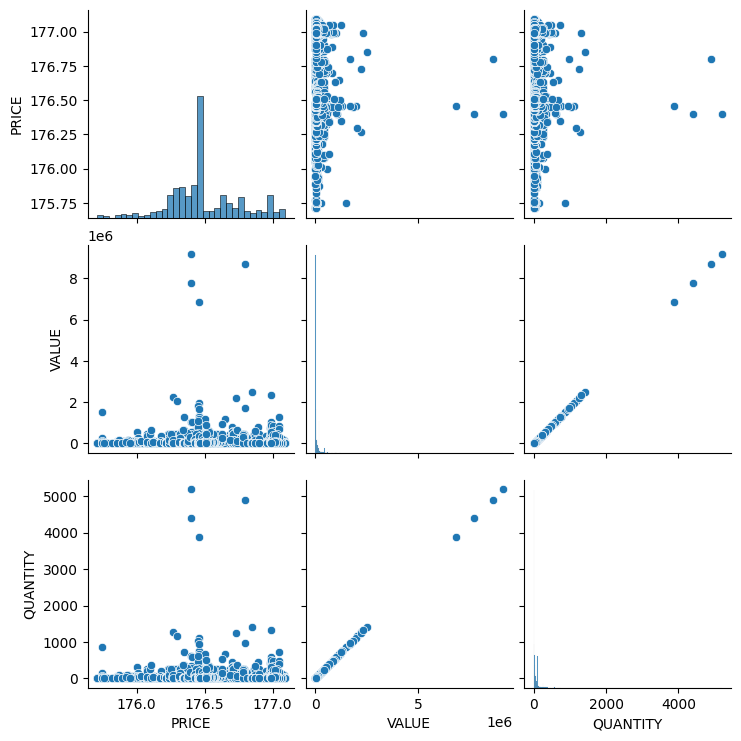

In [5]:
sns.pairplot(df)

<Axes: >

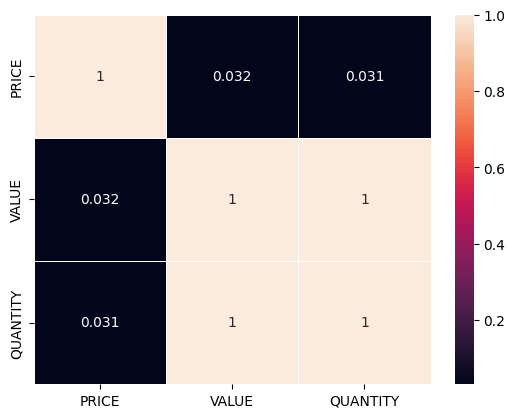

In [6]:
# Построим матрицу корреляции, используя коэффициент корреляции Пирсона
sns.heatmap(df.corr(method='pearson'), annot=True, linewidth=.5)

Из оценки качества модели можно сделать вывод, и между переменными есть слабая связь.

In [7]:
model_1 = ols('PRICE ~ VALUE + QUANTITY', data=df).fit()

print(model_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     127.4
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           9.29e-54
Time:                        12:48:28   Log-Likelihood:                -100.78
No. Observations:                2896   AIC:                             207.6
Df Residuals:                    2893   BIC:                             225.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.4894      0.005   3.66e+04      0.0

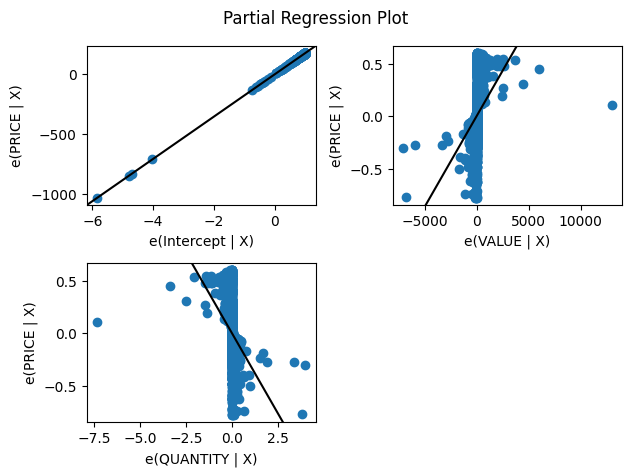

In [8]:
fig = sm.graphics.plot_partregress_grid(model_1)
fig.tight_layout(pad=1.0)

Графики частичной регрессии не показали сильно линейной зависимости. Отклонение асимметрично, что позволяет отвергнуть гомоскедастичность данных.

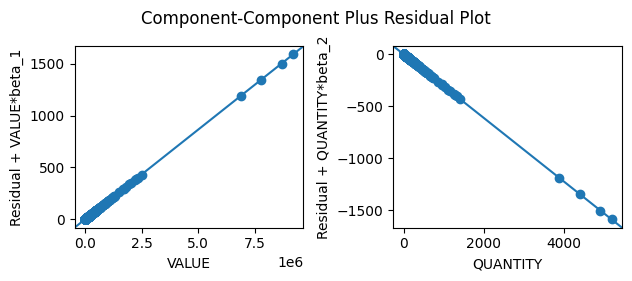

In [9]:
fig = sm.graphics.plot_ccpr_grid(model_1)
fig.tight_layout(pad=1.0)

На CCPR - графиках видно, что линейная связь сохраняется в отношении двух независимых переменных.

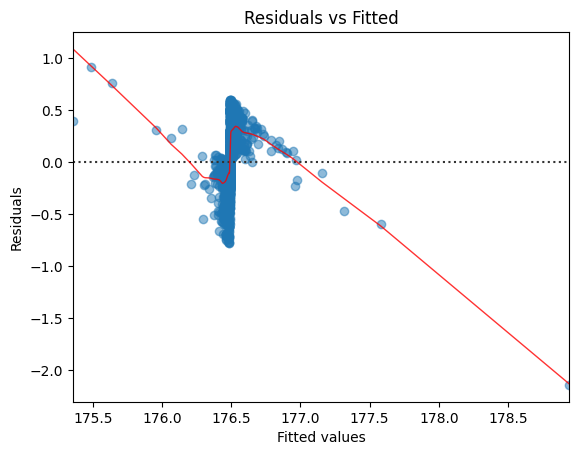

In [10]:
model_fitted_y = model_1.fittedvalues
plot = sns.residplot(x=model_fitted_y, y='PRICE', data=df, lowess=True, scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

Из графика остатков видно, что данные не равно разбросаны относительно нуля с увеличением x.

In [11]:
name = ['Lagrange multiplier statistic', 'p - value', 'f - value', 'f p - value']
test = sm.stats.het_breuschpagan(model_1.resid, model_1.model.exog)
print(name)
print(test)

['Lagrange multiplier statistic', 'p - value', 'f - value', 'f p - value']
(696.9694019365886, 4.518739877449777e-152, 458.4593960580278, 1.111531967888374e-173)


Тест Лагранжа подтверждает данные предположения.

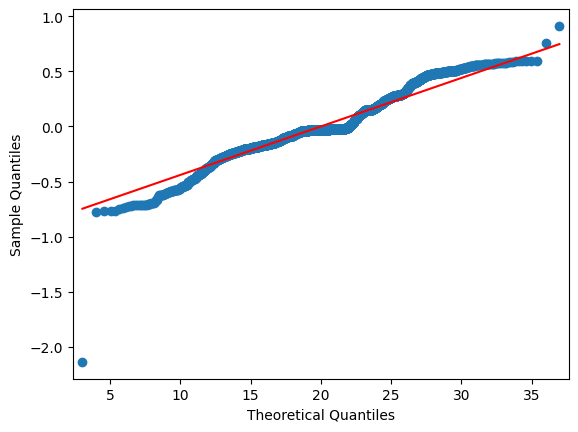

In [12]:
res = model_1.resid

fig = sm.qqplot(res, loc = 20, scale = 5 ,  line='q')

In [13]:
from scipy import stats
stat, p = stats.shapiro(res)
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

1.6501069846221564e-29
Отклонить гипотезу о нормальности


QQ - plot и тест Шапиро - Уилка подтверждают предположения о гетероскедастичности.

Построение графика влияния.

<Figure size 2000x2000 with 0 Axes>

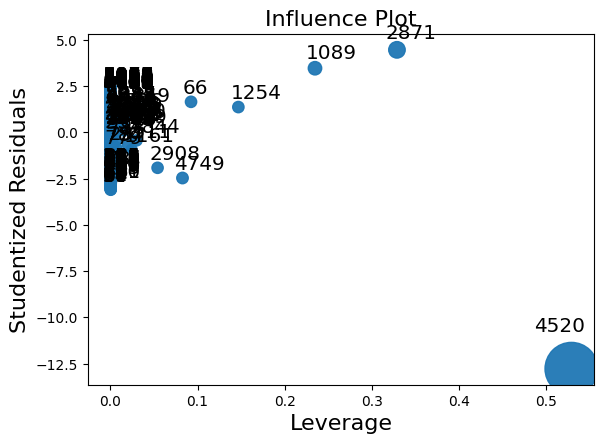

In [14]:
plt.figure(figsize=(20,20))
fig = sm.graphics.influence_plot(model_1, external=True, alpha=0.05, criterion='cooks', size=38, plot_alpha=0.95, ax=None)
fig.tight_layout(pad=2.0)

### Поиск и отбор наиболее влиятельных для модели значений

In [15]:
model_1_cooksd = model_1.get_influence().cooks_distance[0]

n = len(df)

critical_d = 4/n
print('Critical Cooks distance:', critical_d)

out_d = model_1_cooksd > critical_d

print(df.index[out_d], '\n', model_1_cooksd[out_d])

Critical Cooks distance: 0.0013812154696132596
Int64Index([  23,   66,   78,   79,  141,  249,  586, 1089, 1161, 1254, 2871,
            2908, 4511, 4520, 4749, 4787, 4803, 4812, 4843, 4844, 4861, 4870,
            4882, 4969, 5020, 5024, 5028],
           dtype='int64') 
 [1.47850730e-03 9.29730431e-02 4.63067700e-03 1.66913727e-03
 1.62747215e-03 1.93443120e-02 7.79498712e-03 1.22643630e+00
 7.30673116e-03 1.07773423e-01 3.23384228e+00 6.97524180e-02
 3.29994874e-03 5.78505097e+01 1.82242079e-01 1.41040120e-03
 1.53024489e-03 1.62170649e-03 1.95365659e-03 1.91683288e-03
 1.93051851e-03 1.51314718e-03 1.45606425e-03 1.67114756e-03
 1.70650881e-03 1.76063914e-03 1.70503949e-03]


### Удаление наиболее влиятельных значений

In [16]:
dft = df.drop(index=[23, 66, 78, 79, 141, 249, 586, 1089, 1161, 1254, 2871, 2908, 4511, 4520, 4749,
                     4787, 4803, 4812, 4843, 4844, 4861, 4870, 4882, 4969, 5020, 5024, 5028])
dft

,PRICE,VALUE,QUANTITY
2,176.11,8805.5,5.0
3,176.11,7044.4,4.0
4,176.11,103904.9,59.0
6,176.11,17611.0,10.0
7,176.11,5283.3,3.0
...,...,...,...
5044,177.03,8851.5,5.0
5045,177.02,10621.2,6.0
5046,177.02,15931.8,9.0
5047,177.02,44255.0,25.0


### Модель линейной регрессии (y ~ x1+x2+x1*x2). Распределение остатков на нормальность. Оценка качества созданной модели

In [17]:
model_2 = ols('PRICE ~ VALUE + QUANTITY', data=dft).fit()

print(model_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     383.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          3.28e-148
Time:                        12:48:34   Log-Likelihood:                 152.84
No. Observations:                2869   AIC:                            -299.7
Df Residuals:                    2866   BIC:                            -281.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.4903      0.005   3.64e+04      0.0

Удаление наиболее влиятельных значений привело к увеличению качества модели. Это решение подтверждается скорректированным значением R2, стремящимся к 1, большим значением F и малым значением p, которые позволяют предположить, что модель лучше, чем предыдущая.

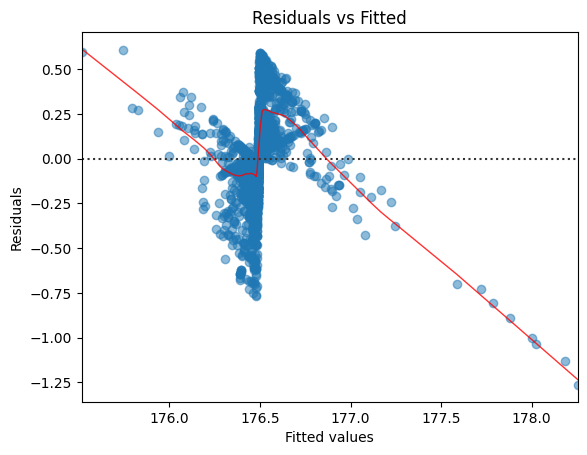

In [18]:
model_fitted_y = model_2.fittedvalues
plot = sns.residplot(x=model_fitted_y, y='PRICE', data=dft, lowess=True, scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

График остатков изменил свой вид незначительно.

In [19]:
model_3 = ols('PRICE ~ VALUE + QUANTITY + VALUE*QUANTITY', data=df).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     85.91
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.02e-53
Time:                        12:48:34   Log-Likelihood:                -99.403
No. Observations:                2896   AIC:                             206.8
Df Residuals:                    2892   BIC:                             230.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        176.4861      0.005   3.38e

Модель, учитывающая взаимосвязь двух независимых переменных, не отличается по качеству от предыдущих, так как видимая связь между ними отсутствует.
Можно сказать, что модель показала себя хуже по F - statistic и большимначением p.

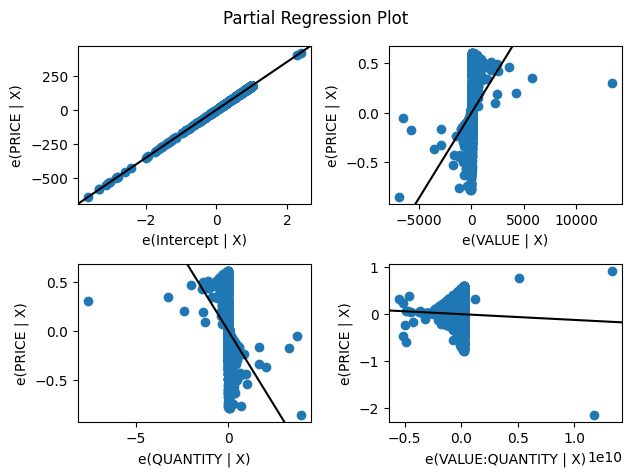

In [20]:
fig = sm.graphics.plot_partregress_grid(model_3)
fig.tight_layout(pad=1.0)

Введение новой независимой переменной повлияло на распределение в частичных регрессиях из - за чего графики изменили свой вид.

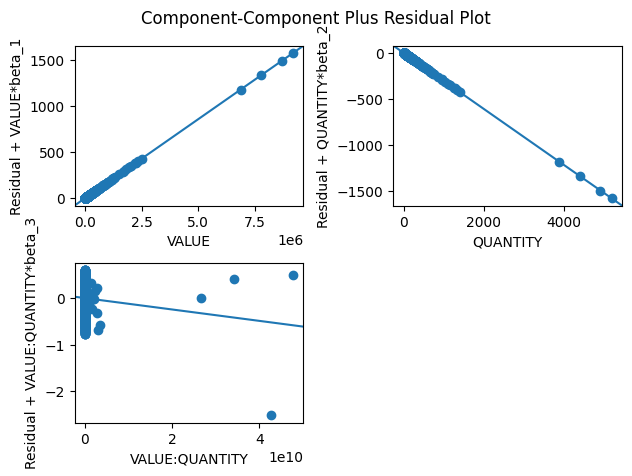

In [21]:
fig = sm.graphics.plot_ccpr_grid(model_3)
fig.tight_layout(pad=1.0)

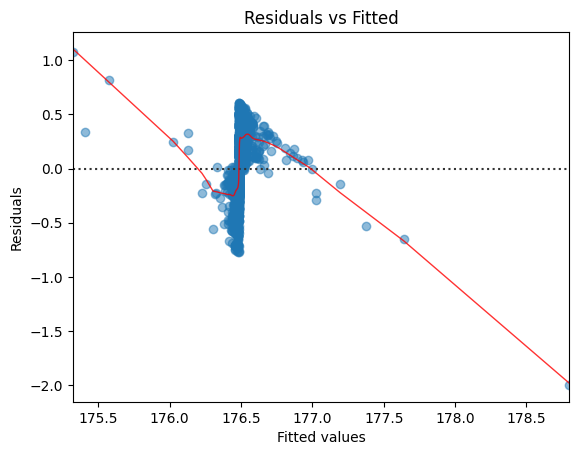

In [22]:
model_fitted_y = model_3.fittedvalues
plot = sns.residplot(x=model_fitted_y, y='PRICE', data=df, lowess=True, scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [23]:
name = ['Lagrange multiplier statistic', 'p - value', 'f - value', 'f p -v alue']
test = sm.stats.het_breuschpagan(model_3.resid, model_3.model.exog)
print(name)
print(test)

['Lagrange multiplier statistic', 'p - value', 'f - value', 'f p -v alue']
(1003.8219688192646, 2.6670396367064944e-217, 511.4129653740497, 1.3464657922595834e-266)


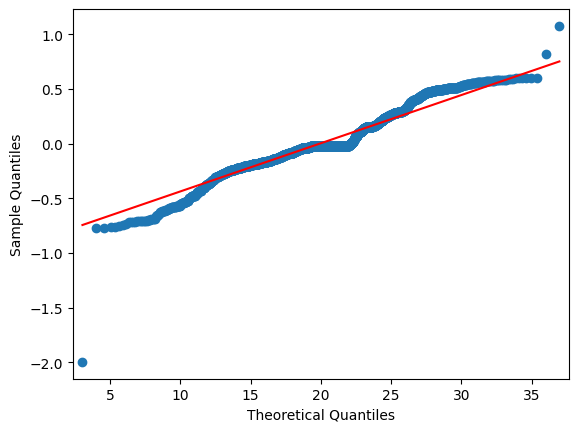

In [24]:
res = model_3.resid

fig = sm.qqplot(res, loc = 20, scale = 5 ,  line='q')

In [25]:
from scipy import stats
stat, p = stats.shapiro(res)
alpha = 0.05
print(p)
if p > alpha:
 print('Принять гипотезу о нормальности')
else:
 print('Отклонить гипотезу о нормальности')

7.232830658462649e-30
Отклонить гипотезу о нормальности


# Вывод:

Выполнено построение 3 моделей линейной двуфакторной регрессии для данных по трейдинговым операциям. Была выполнена оценка качетсва всех моделей регресси и наиболее эффективной себя показала 2 модель из - за исключения наиболее влиятельных значений.